In [166]:
from ucimlrepo import fetch_ucirepo 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [136]:
heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
y = heart_disease.data.targets 

X["target"] = y["num"]


In [137]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [139]:
for i in list(X.columns):
    print("{} : {}".format(i , X[i].nunique()))

age : 41
sex : 2
cp : 4
trestbps : 50
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 4
thal : 3
target : 5


In [140]:
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]


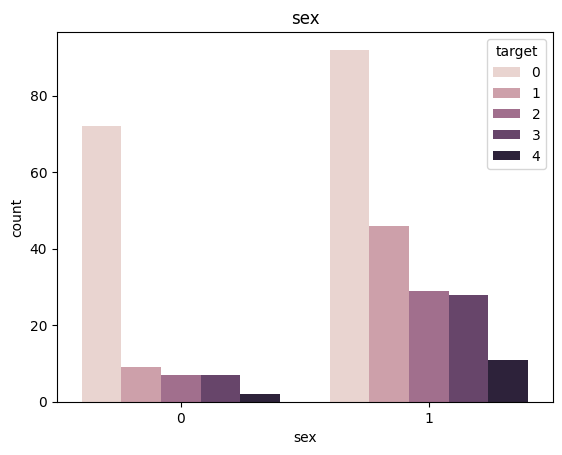

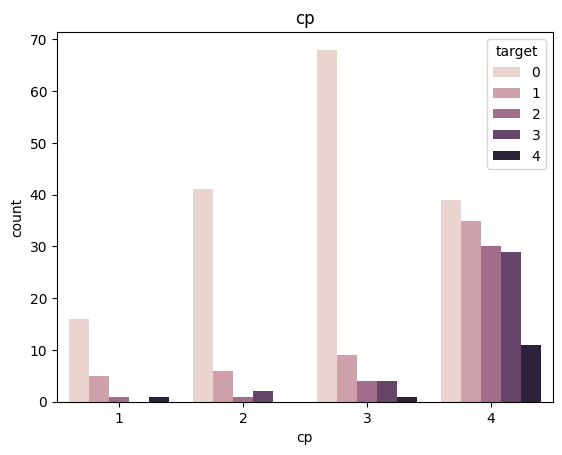

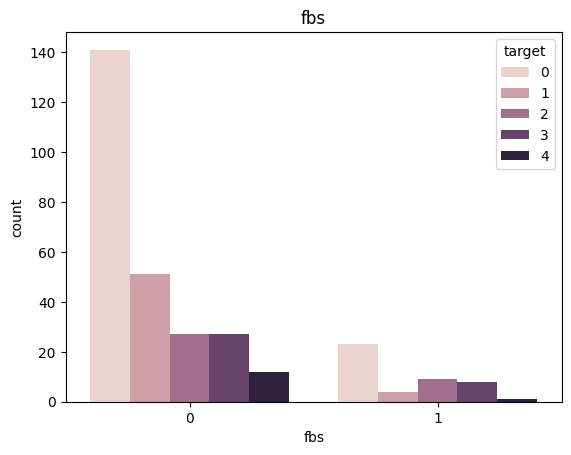

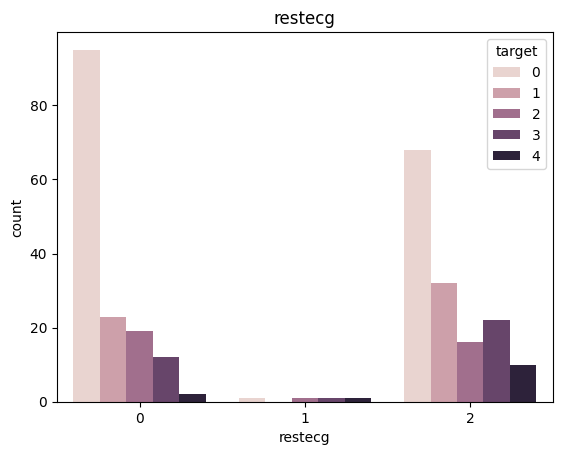

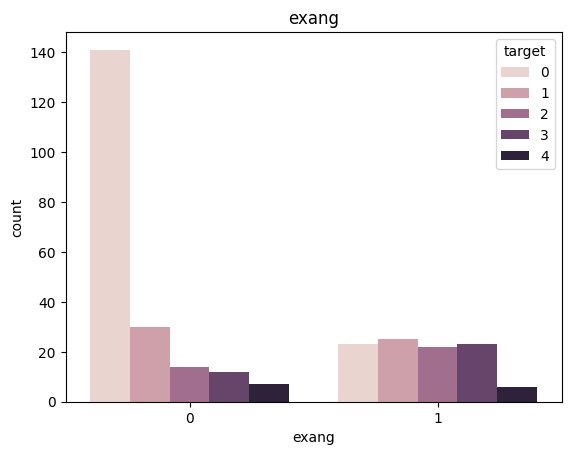

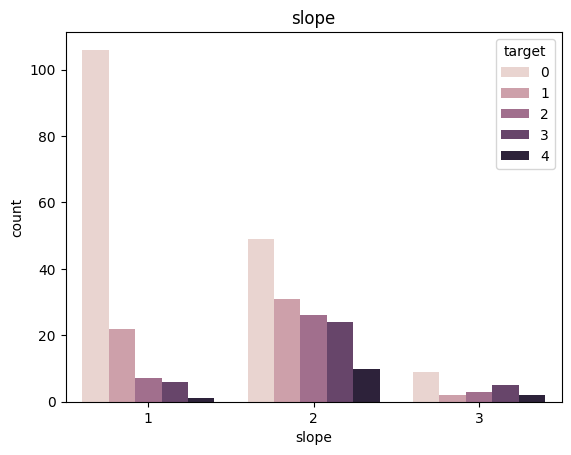

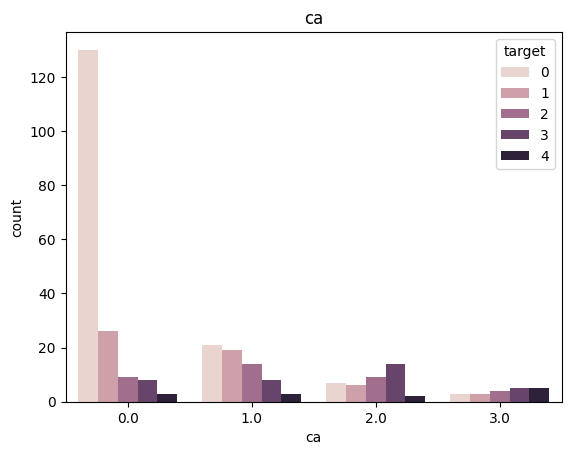

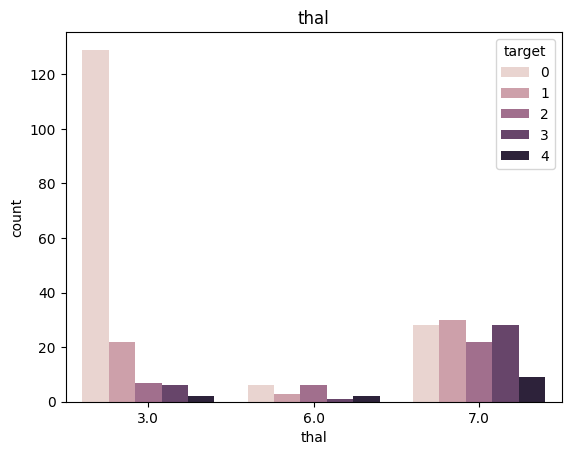

In [121]:
for i in cat_cols:
    plt.figure()
    sns.countplot(x=i, data=X, hue="target")
    plt.title(i)

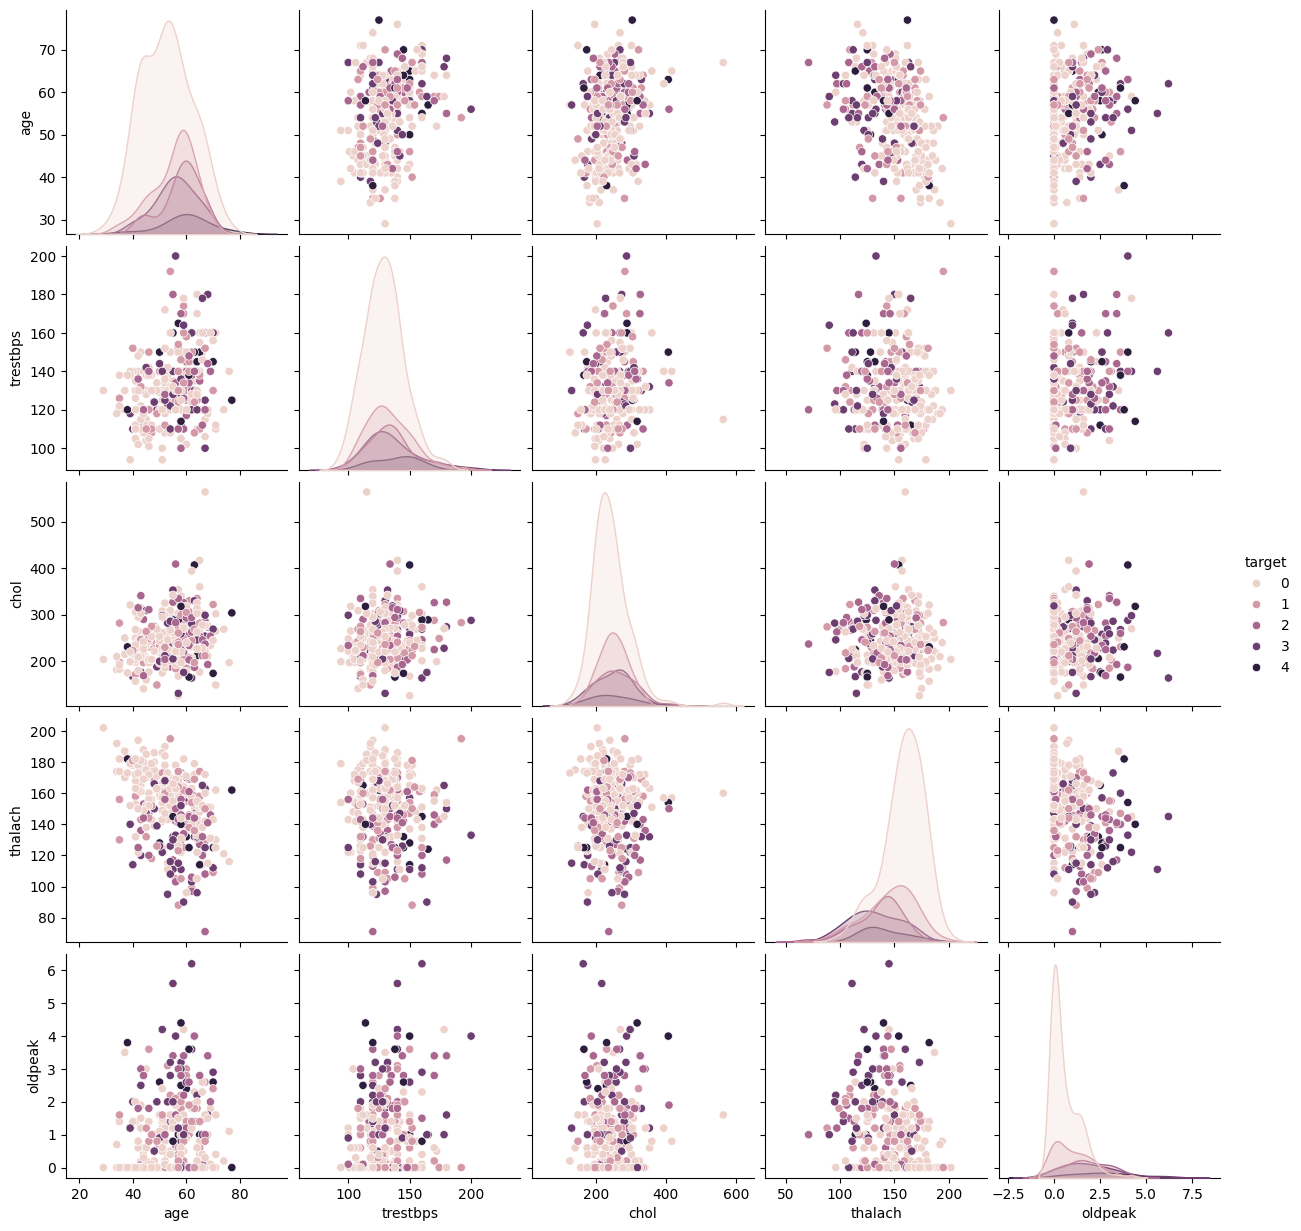

In [122]:
sns.pairplot(data=X, vars=num_cols, hue="target", diag_kind="kde")
plt.show()


In [141]:
X[X.isnull().any(axis=1)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [142]:
for col in ["ca", "thal"]:
    X[col] = X.groupby("target")[col].transform(lambda x: x.fillna(x.mode()[0]))

X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

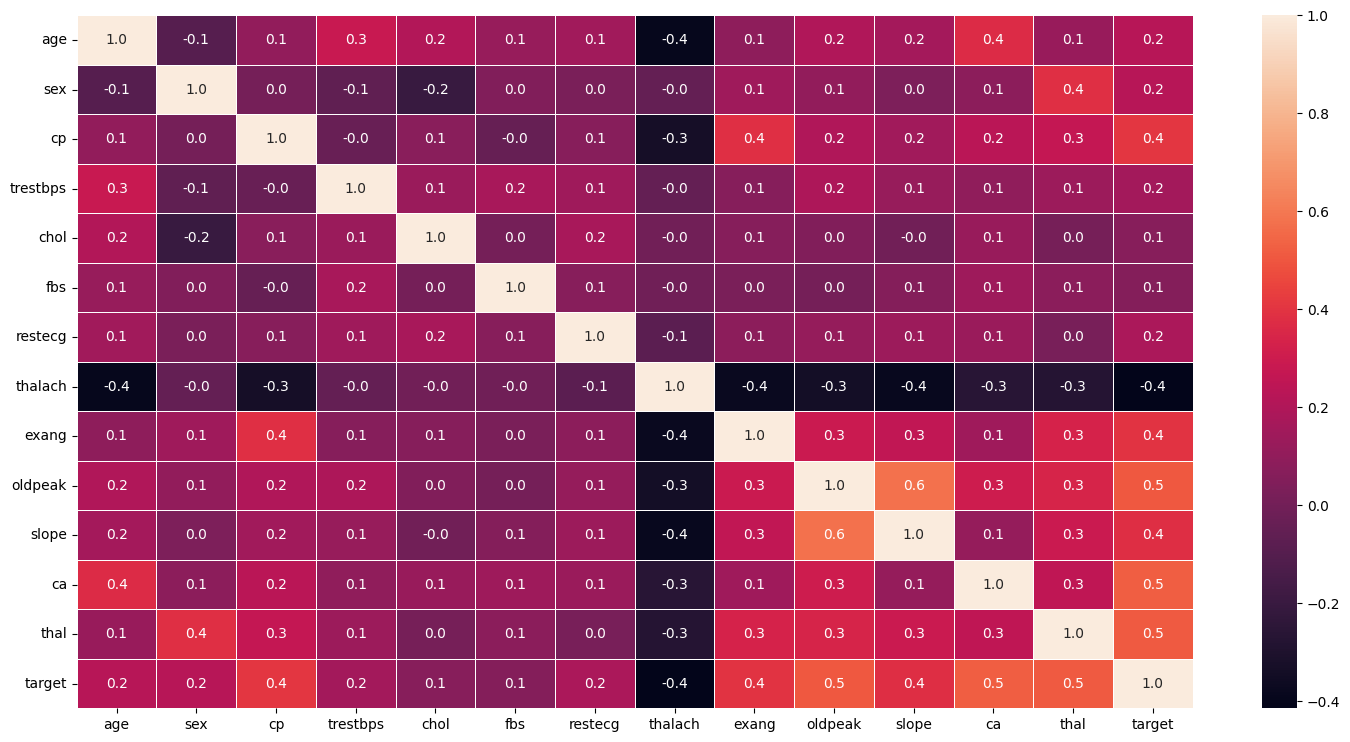

In [125]:
plt.figure(figsize=(18,9))
sns.heatmap(X.corr(), annot=True, fmt=".1f", linewidths=.7)
plt.show()

In [143]:
for i in num_cols:

    Q1 = np.percentile(X.loc[:, i], 25)
    Q3 = np.percentile(X.loc[:, i], 75)

    IQR = Q3 -Q1

    print("oldshape", X.loc[:, i].shape)

    upper = np.where(X.loc[:, i] >= (Q3 + 2.5*IQR))
    lower = np.where(X.loc[:, i] <= (Q1 - 2.5*IQR))

    print("{} - {}".format(upper, lower))

    try:
        X.drop(upper[0], inplace=True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    try:
        X.drop(lower[0], inplace=True)
    except: print("KeyError: {} not found in axis".format(lower[0]))

    print("new shape : ", X.shape)
    

oldshape (303,)
(array([], dtype=int64),) - (array([], dtype=int64),)
new shape :  (303, 14)
oldshape (303,)
(array([126, 188]),) - (array([], dtype=int64),)
new shape :  (301, 14)
oldshape (301,)
(array([151]),) - (array([], dtype=int64),)
new shape :  (300, 14)
oldshape (300,)
(array([], dtype=int64),) - (array([], dtype=int64),)
new shape :  (300, 14)
oldshape (300,)
(array([ 91, 123]),) - (array([], dtype=int64),)
new shape :  (298, 14)


In [144]:
X = pd.get_dummies(data=X, columns=cat_cols, drop_first=True)
X.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67,160,286,108,1.5,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67,120,229,129,2.6,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37,130,250,187,3.5,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41,130,204,172,1.4,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [145]:
scaler = StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])

X.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.943807,0.822683,-0.265589,0.011092,1.198994,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.385336,1.719172,0.758262,-1.840010,0.460007,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.385336,-0.671464,-0.342861,-0.914459,1.476114,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.926136,-0.073805,0.062816,1.641825,2.307475,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.484607,-0.073805,-0.825810,0.980717,0.367634,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
y = X[["target"]].copy()

X = X.drop("target", axis=1)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(268, 20)
(30, 20)
(268, 1)
(30, 1)


In [152]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)

y_pred_prob

/home/aysemine/ensemble-learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.08268711e-02, 1.87110739e-01, 3.62693129e-01, 4.11641439e-01,
        2.77278217e-02],
       [9.31177116e-01, 4.22863993e-02, 4.73685137e-03, 2.05832745e-02,
        1.21635866e-03],
       [6.32879843e-01, 2.66996842e-01, 6.39055165e-02, 2.60110331e-02,
        1.02067663e-02],
       [9.51205172e-01, 4.04574129e-02, 4.89756418e-03, 2.73099996e-03,
        7.08850944e-04],
       [6.57602396e-01, 2.36557333e-01, 2.45768942e-02, 5.43561344e-02,
        2.69072420e-02],
       [9.51906121e-01, 4.37053485e-02, 1.91071667e-03, 2.09207538e-03,
        3.85738118e-04],
       [6.67417812e-01, 1.33933706e-01, 1.13840506e-01, 2.48587204e-02,
        5.99492559e-02],
       [9.60105345e-01, 2.89614093e-02, 4.33944498e-03, 5.38711194e-03,
        1.20668864e-03],
       [9.95756330e-01, 3.59280044e-03, 1.61318785e-04, 4.72686404e-04,
        1.68645263e-05],
       [9.12903205e-01, 7.94296417e-02, 2.90559649e-03, 4.25358421e-03,
        5.07972690e-04],
       [2.76421659e-01, 3.2243

In [155]:
y_pred = np.argmax(y_pred_prob, axis=1)

print("acc : {}".format(accuracy_score(y_pred, y_test)))

acc : 0.5333333333333333


In [ ]:
lr = LogisticRegression()

penalty = ["l1", "l2"]

param_grid = {
    'penalty': ['l1', 'l2'],
    'solver':  ['liblinear', 'saga']
}

lr_searcher = GridSearchCV(lr, param_grid)

lr_searcher.fit(X_train, y_train)

print("best params: {}".format(lr_searcher.best_params_))
print("best acc: {}".format(lr_searcher.best_score_))

best params: {'penalty': 'l2', 'solver': 'liblinear'}
best acc: 0.5896575821104123
